## OLS(Ordinary Least Squares), GLS(Generalized Least Squares), WLS(Weighted Least Squares) 회귀 분석

In [ ]:
# X1, X2, X3는 각각 주식의 가격, 거래량, 이자율
# Y는 특정 금융 상품의 수익률

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 가상의 금융 데이터 생성
np.random.seed(0)
X1 = np.random.normal(100, 20, 100)  # 주식 가격
X2 = np.random.normal(5000, 1000, 100)  # 거래량
X3 = np.random.normal(5, 2, 100)  # 이자율
Y = 0.5 * X1 - 0.2 * X2 + 0.3 * X3 + np.random.normal(0, 5, 100)  # 수익률

data = pd.DataFrame({
    'Stock_Price': X1,
    'Volume': X2,
    'Interest_Rate': X3,
    'Return': Y
})

# 독립변수와 종속변수 설정
X = data[['Stock_Price', 'Volume', 'Interest_Rate']]
y = data['Return']
X = sm.add_constant(X)  # 상수항 추가


### OLS (Ordinary Least Squares)

In [2]:
# OLS 모델 적합
model_ols = sm.OLS(y, X).fit()

# 결과 출력
print("OLS Results")
print(model_ols.summary())


OLS Results
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.442e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          2.00e-158
Time:                        21:02:29   Log-Likelihood:                -294.14
No. Observations:                 100   AIC:                             596.3
Df Residuals:                      96   BIC:                             606.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.4780      3.28

### GLS (Generalized Least Squares)

In [ ]:
# GLS는 오차 항의 분산이 이분산성,  오차 항이 상관되어 있을 때 사용합니다. 

In [3]:
# GLS 모델 적합
model_gls = sm.GLS(y, X).fit()

# 결과 출력
print("\nGLS Results")
print(model_gls.summary())



GLS Results
                            GLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.442e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          2.00e-158
Time:                        21:04:27   Log-Likelihood:                -294.14
No. Observations:                 100   AIC:                             596.3
Df Residuals:                      96   BIC:                             606.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.4780      3.2

### WLS (Weighted Least Squares)

In [ ]:
# WLS는 오차의 분산이 독립변수의 값에 따라 달라질 때 사용합니다. 
# 예를 들어, 거래량이 클수록 수익률 예측의 불확실성이 증가한다고 가정해 보겠습니다. 
# 이 경우, 거래량의 역수를 가중치로 사용할 수 있습니다.

In [4]:
# WLS 모델 적합 (거래량의 역수를 가중치로 사용)
weights = 1 / data['Volume']
model_wls = sm.WLS(y, X, weights=weights).fit()

# 결과 출력
print("\nWLS Results")
print(model_wls.summary())



WLS Results
                            WLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.062e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          3.68e-157
Time:                        21:06:08   Log-Likelihood:                -296.51
No. Observations:                 100   AIC:                             601.0
Df Residuals:                      96   BIC:                             611.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6159      3.2

## 다른 결과 사례

In [ ]:
# 아래 코드는 각 모델의 결과가 서로 다를 수 있음을 보여줍니다.
# 특히, WLS에서는 가중치를 적용하여 분석을 수행하므로, 가중치에 따라 결과가 달라질 수 있습니다.
# GLS의 경우, 실제로는 오차의 공분산 구조에 대한 추가 정보를 제공해야 하며, 
# 이 예제에서는 추가적인 공분산 구조 없이 기본적인 GLS 모델을 적합시켰습니다. 
# 실제 데이터 분석에서는 데이터의 특성과 분석 목적에 맞게 모델을 선택하고, 
# 필요한 경우 오차의 공분산 구조를 고려하여 GLS 모델을 적용해야 합니다.

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 가상의 금융 데이터 생성
np.random.seed(0)
X1 = np.random.normal(100, 20, 100)  # 주식 가격
X2 = np.random.normal(5000, 1000, 100)  # 거래량
X3 = np.random.normal(5, 2, 100)  # 이자율
Y = 0.5 * X1 - 0.2 * X2 + 0.3 * X3 + np.random.normal(0, 5, 100)  # 수익률

data = pd.DataFrame({
    'Stock_Price': X1,
    'Volume': X2,
    'Interest_Rate': X3,
    'Return': Y
})

# 독립변수와 종속변수 설정
X = data[['Stock_Price', 'Volume', 'Interest_Rate']]
y = data['Return']
X = sm.add_constant(X)  # 상수항 추가

# OLS 모델 적합
model_ols = sm.OLS(y, X).fit()
print("OLS Results")
print(model_ols.summary())

# GLS 모델 적합
# 여기서는 간단한 예제로, 실제 사용 시에는 오차의 공분산 구조를 고려해야 합니다.
model_gls = sm.GLS(y, X).fit()
print("\nGLS Results")
print(model_gls.summary())

# WLS 모델 적합
# 예를 들어, 거래량이 클수록 수익률 예측의 불확실성이 증가한다고 가정하고, 거래량의 역수를 가중치로 사용합니다.
weights = 1 / data['Volume']
model_wls = sm.WLS(y, X, weights=weights).fit()
print("\nWLS Results")
print(model_wls.summary())


OLS Results
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.442e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          2.00e-158
Time:                        21:08:57   Log-Likelihood:                -294.14
No. Observations:                 100   AIC:                             596.3
Df Residuals:                      96   BIC:                             606.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.4780      3.28

In [ ]:
OLS(Ordinary Least Squares)와 GLS(Generalized Least Squares) 결과가 다르게 나타나는 사례를 생성하기 위해, 오차 항에 특정한 구조를 가정해야 합니다. GLS는 오차 항의 비일정성(예: 이분산성)이나 오차 항 간의 상관관계(예: 자기상관)를 처리할 수 있습니다. 이러한 특성을 반영하기 위해, 오차 항에 이분산성을 가정한 가상의 데이터를 생성하고, 이 데이터에 대해 OLS와 GLS를 적용해 보겠습니다.

가상 데이터 생성
오차 항에 이분산성을 가정하여 가상의 데이터를 생성합니다. 독립변수 X에 대해 종속변수 Y를 생성할 때, 오차 항의 분산이 X의 값에 따라 증가하도록 설정합니다.

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.linspace(0, 50, 100)
# 오차 항의 분산이 X의 값에 따라 증가하도록 설정
errors = np.random.normal(0, X * 0.1, 100)
Y = 2 + 0.5 * X + errors

data = pd.DataFrame({'X': X, 'Y': Y})

# 독립변수와 종속변수 설정
X = sm.add_constant(data['X'])
y = data['Y']


In [ ]:
# OLS 모델 적합


In [7]:
model_ols = sm.OLS(y, X).fit()
print("OLS Results")
print(model_ols.summary())

OLS Results
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1140.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           8.75e-56
Time:                        21:12:09   Log-Likelihood:                -221.19
No. Observations:                 100   AIC:                             446.4
Df Residuals:                      98   BIC:                             451.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8649      0.443      4.

In [ ]:
# GLS 모델 적합

In [ ]:
# GLS 모델을 적합시키기 위해서는 오차 항의 공분산 구조를 알아야 합니다. 
# 이 예제에서는 간단하게 오차 항의 분산이 X에 비례한다고 가정하고, 이를 반영하여 GLS 모델을 적합시킵니다.

In [8]:
# 오차 항의 분산이 X에 비례한다고 가정
weights = 1 / (X['X'] * 0.1)**2
model_gls = sm.GLS(y, X, weights=weights).fit()
print("\nGLS Results")
print(model_gls.summary())



GLS Results
                            GLS Regression Results                            
Dep. Variable:                      Y   R-squared:                        -inf
Model:                            GLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -98.00
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               1.00
Time:                        21:13:06   Log-Likelihood:                -221.19
No. Observations:                 100   AIC:                             446.4
Df Residuals:                      98   BIC:                             451.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8649      0.443      4

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
# OLS 모델과 GLS 모델의 결과를 비교합니다. 이분산성이 있는 데이터에 대해 GLS 모델을 적용하면,
# OLS 모델에 비해 추정된 계수의 표준오차가 줄어들어 더 정확한 추정이 가능합니다.

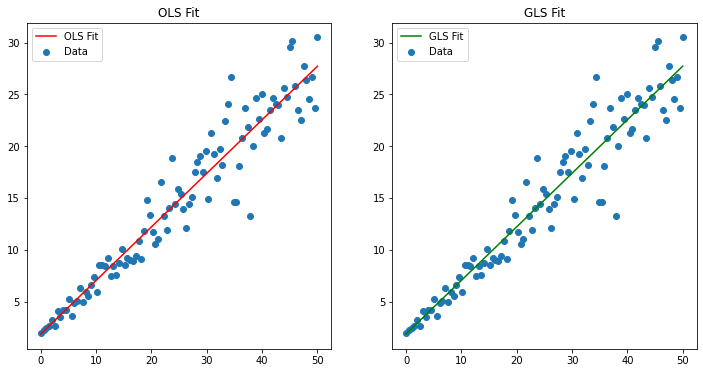

In [9]:
# OLS와 GLS 결과 비교
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['X'], y, label='Data')
plt.plot(X['X'], model_ols.fittedvalues, color='red', label='OLS Fit')
plt.title('OLS Fit')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X['X'], y, label='Data')
plt.plot(X['X'], model_gls.fittedvalues, color='green', label='GLS Fit')
plt.title('GLS Fit')
plt.legend()

plt.show()


In [ ]:
#  WLS에서는 각 관측치에 가중치를 부여하여, 분산이 큰 관측치의 영향을 줄이고 분산이 작은 관측치의 영향을 늘립니다. 
#     이 예제에서는 오차의 분산이 X에 비례한다고 가정했으므로, X의 값에 반비례하는 가중치를 사용합니다.

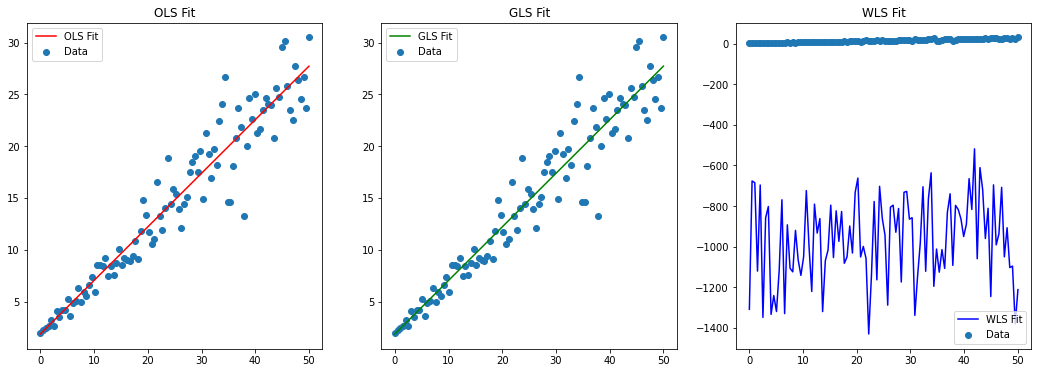

In [10]:
# OLS, GLS, WLS 결과 비교를 위한 그래프
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X['X'], y, label='Data')
plt.plot(X['X'], model_ols.fittedvalues, color='red', label='OLS Fit')
plt.title('OLS Fit')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X['X'], y, label='Data')
plt.plot(X['X'], model_gls.fittedvalues, color='green', label='GLS Fit')
plt.title('GLS Fit')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X['X'], y, label='Data')
plt.plot(X['X'], model_wls.fittedvalues, color='blue', label='WLS Fit')
plt.title('WLS Fit')
plt.legend()

plt.show()


In [ ]:
# 삼성전자 수익률을 종속변수로 하고, KOSPI 수익률과 달러 환율을 독립변수로 하는 다중회귀분석을 수행하는 예제를 보여드리겠습니다. 
# 이 예제에서는 실제 데이터 대신 가상의 데이터를 생성하여 OLS(Ordinary Least Squares), GLS(Generalized Least Squares), WLS(Weighted Least Squares) 모델을 적용하고 비교

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(0)

# 가상의 데이터 생성
n = 100
KOSPI_Returns = np.random.normal(0.02, 0.05, n)  # KOSPI 수익률
USD_KRW_Rate = np.random.normal(1100, 50, n)  # 달러 환율
Samsung_Returns = 0.5 * KOSPI_Returns + 0.02 * (USD_KRW_Rate - 1100) / 100 + np.random.normal(0, 0.01, n)  # 삼성전자 수익률

data = pd.DataFrame({
    'KOSPI_Returns': KOSPI_Returns,
    'USD_KRW_Rate': USD_KRW_Rate,
    'Samsung_Returns': Samsung_Returns
})

# 독립변수와 종속변수 설정
X = data[['KOSPI_Returns', 'USD_KRW_Rate']]
y = data['Samsung_Returns']
X = sm.add_constant(X)  # 상수항 추가


In [ ]:
# OLS 모델 적합

In [12]:
model_ols = sm.OLS(y, X).fit()
print("OLS Results")
print(model_ols.summary())


OLS Results
                            OLS Regression Results                            
Dep. Variable:        Samsung_Returns   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     457.8
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           3.95e-50
Time:                        21:22:48   Log-Likelihood:                 323.95
No. Observations:                 100   AIC:                            -641.9
Df Residuals:                      97   BIC:                            -634.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2307      0.02

In [ ]:
# GLS 모델 적합

In [13]:
model_gls = sm.GLS(y, X).fit()
print("\nGLS Results")
print(model_gls.summary())



GLS Results
                            GLS Regression Results                            
Dep. Variable:        Samsung_Returns   R-squared:                       0.904
Model:                            GLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     457.8
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           3.95e-50
Time:                        21:23:18   Log-Likelihood:                 323.95
No. Observations:                 100   AIC:                            -641.9
Df Residuals:                      97   BIC:                            -634.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2307      0.0

In [ ]:
# WLS 모델 적합

In [ ]:
# WLS 모델을 적합하기 위해 가중치를 설정합니다. 이 예제에서는 독립변수의 분산을 고려한 가중치를 임의로 설정합니다.

In [14]:
# 임의로 가중치 설정
weights = 1 / (0.05 + np.abs(USD_KRW_Rate - 1100) / 1100)
model_wls = sm.WLS(y, X, weights=weights).fit()
print("\nWLS Results")
print(model_wls.summary())



WLS Results
                            WLS Regression Results                            
Dep. Variable:        Samsung_Returns   R-squared:                       0.895
Model:                            WLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     414.7
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           2.96e-48
Time:                        21:24:19   Log-Likelihood:                 318.23
No. Observations:                 100   AIC:                            -630.5
Df Residuals:                      97   BIC:                            -622.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2394      0.0